In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,r2_score , mean_squared_error
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Pre-processing :-

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## EDA :-

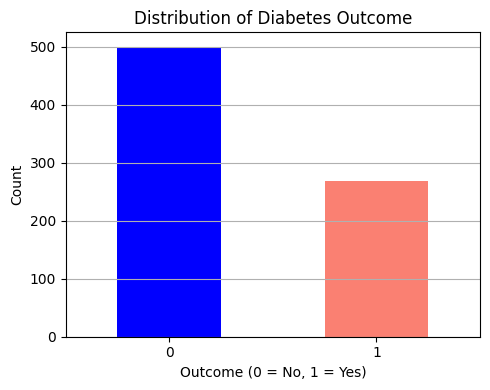

In [7]:
plt.figure(figsize=(5,4))
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'salmon'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


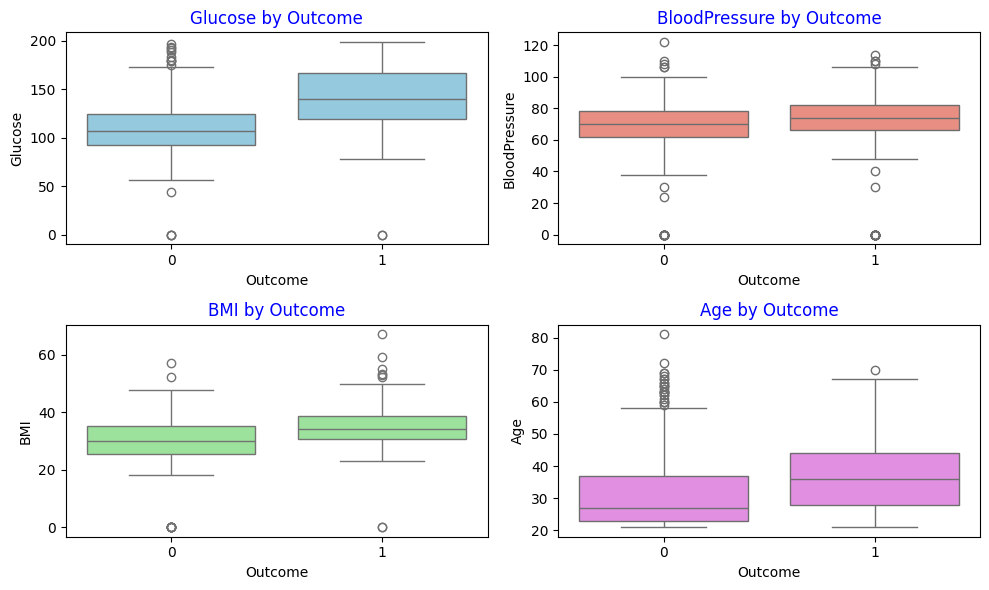

In [8]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
colors = ['skyblue', 'salmon', 'lightgreen', 'violet']  

plt.figure(figsize=(10,6))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Outcome', y=feature, data=df, color=colors[i])  # Apply color
    plt.title(f'{feature} by Outcome',color='blue')

plt.tight_layout()
plt.show()

## Model Building :-

In [9]:
X = df[['Glucose', 'BloodPressure', 'BMI', 'Age']]  # Input features
y = df['Outcome']   # Target variable

In [10]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42)

In [11]:
# Training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=30)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

## Evaluation :-

In [12]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Accuracy : ',round(accuracy,3))
print('Mean Squared Error : ',round(mse,3))
print('R2 Score : ',round(r2,3))


Accuracy :  0.701
Mean Squared Error :  0.299
R2 Score :  -0.301


In [13]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(614, 4)
(614,)
(154, 4)
(154,)


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



In [16]:
# Feature names in order
feature_names = [ 'Glucose', 'BloodPressure', 'BMI',  'Age']

# Collect input values from user
print("Enter the following values to predict diabetes :")
user_input = []

for feature in feature_names:
    val = float(input(f"Enter {feature} value: "))
    user_input.append(val)

# Convert to NumPy array and reshape for prediction
user_data = np.array(user_input).reshape(1, -1)

# Make prediction
prediction = clf.predict(user_data)

# Show result
if prediction[0] == 1:
    print("👉 Outcome :",prediction[0])
    print("The model predicts: Diabetes Positive ✅")
else:
    print("👉 Outcome : ",prediction[0])
    print("The model predicts: Diabetes Negative ❌")


Enter the following values to predict diabetes :
👉 Outcome : 1
The model predicts: Diabetes Positive ✅


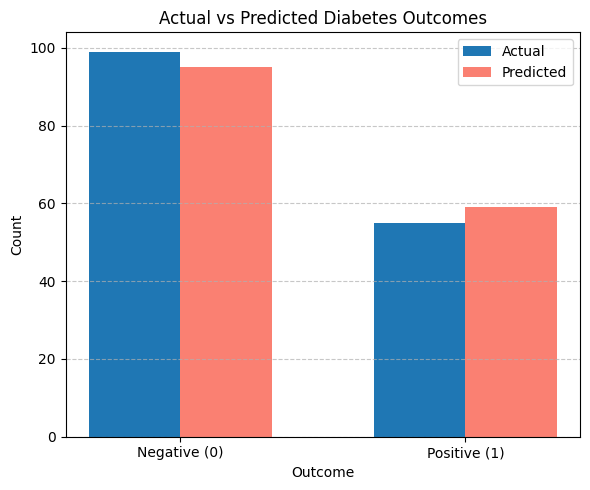

In [17]:
# Compare actual and predicted values
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred)

labels = ['Negative (0)', 'Positive (1)']

x = np.arange(len(labels))
width = 0.32

plt.figure(figsize=(6,5))
plt.bar(x - width/2, actual_counts, width, label='Actual', color='#1f77b4')
plt.bar(x + width/2, predicted_counts, width, label='Predicted', color='salmon')

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Actual vs Predicted Diabetes Outcomes')
plt.xticks(ticks=x, labels=labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
